# Imports

In [2]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline
import nupack
from sklearn.model_selection import train_test_split

# Data prep

## Basic filtering

This removes non-hairpin forming control constructs to make model training easier.

### arr_v0

No 2 state filter. Not really used but kept to be consistent with historical analysis.

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211216_v9.CPvariant.gz
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5

Combining dH

Combining Tm

Combining dG_37

Combining dS

Combining fmax

Combining fmin
(30680, 42)


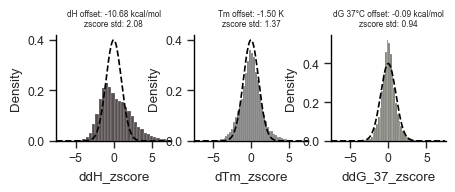

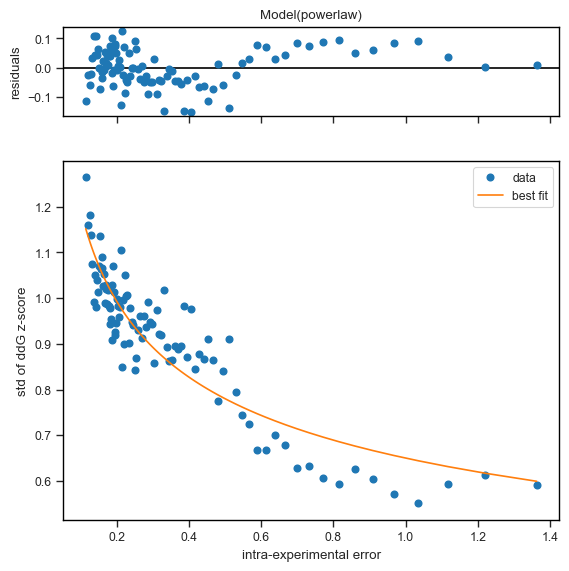

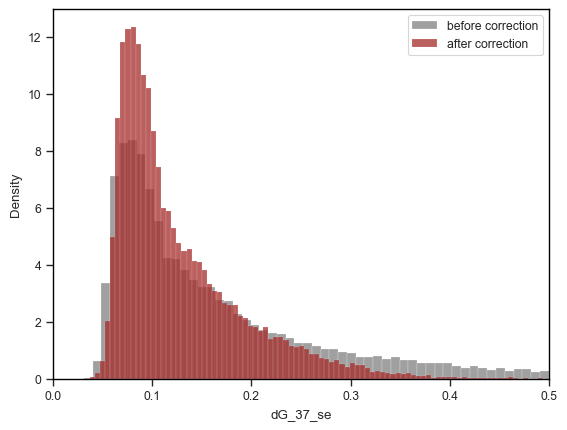

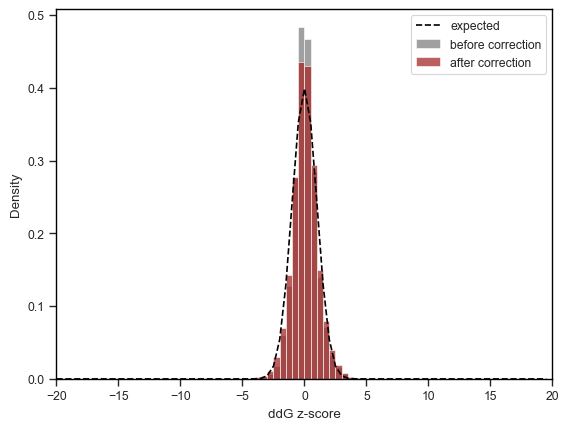

In [2]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
arraydata = ArrayData(replicate_df=replicate_df.iloc[:3,:],
                      annotation_file=annotation_file,
                      learn_error_adjust_from=('r1', 'r2'))
arr = arraydata.data.join(arraydata.annotation)

excluded_construct_type = ['pseudoknot_pt_muts', 'PolyNTControls', 'RepeatControls', 'StemDangle_3p', 'StemDangle_53p', 'StemDangle_5p', 'PUMcontrols']
arr = arr[arr.reset_index().ConstructType.apply(lambda s: s not in excluded_construct_type).values]
arr = arr.dropna(subset=['ConstructType', 'RefSeq','TargetStruct'])

print(arr.shape)
arr.to_csv(os.path.join('./data/models/raw', 'arr_v0_n=%d.csv' % arr.shape[0]))

### arr_v1

With (relaxed) 2-state filter & variant-level Tm filter.

!!! 
```
arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                    annotation_file=annotation_file)
```
somehow broke. Cannot load rev replicate normally.
Temporarily excluded the replicate and saved to `arr_v1_n=27614.csv`

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


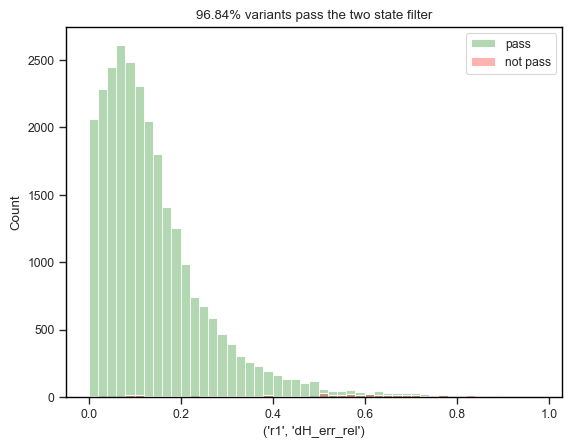

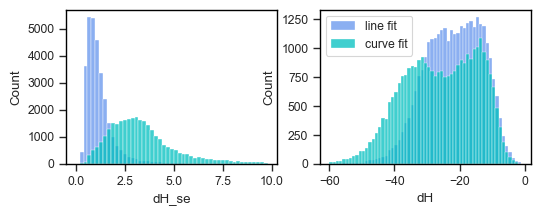

(27614, 45)


In [4]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file, sodium=0.083)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')

arraydata = ArrayData(replicate_df=replicate_df.iloc[:3,:],
                    annotation_file=annotation_file)

myfilter = "dH_err_rel < 0.5 & Tm_err_abs < 10 & redchi < 2 & n_inlier > 8"
pass_df = arraydata.filter_two_state(min_rep_pass=1, force_recalculate=True, overwrite_dH=False, 
                                     inplace=True, myfilter=myfilter)

variant_filter = 'Tm < 60 & Tm > 0'
arr = arraydata.data.join(arraydata.annotation).query(variant_filter)

excluded_construct_type = ['pseudoknot_pt_muts', 'PolyNTControls', 'RepeatControls', 'StemDangle_3p', 'StemDangle_53p', 'StemDangle_5p', 'PUMcontrols']
arr = arr[arr.reset_index().ConstructType.apply(lambda s: s not in excluded_construct_type).values]
arr = arr.dropna(subset=['ConstructType', 'RefSeq','TargetStruct'])

print(arr.shape)
arr.to_csv(os.path.join('./data/models/raw', 'arr_v1_n=%d.csv' % arr.shape[0]))

### arr_p_unfold

For sequence-to-melt-curve deep learning models. Control variants excluded in the arr file for structure energy models are included here.

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211022_v6.CPvariant.gz
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
Load from file ./data/fitted_variant/NNNlib2b_DNA_20211216_v9.CPvariant.gz
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5

Combining dH

Combining Tm

Combining dG_37

Combining dS

Combining fmax

Combining fmin


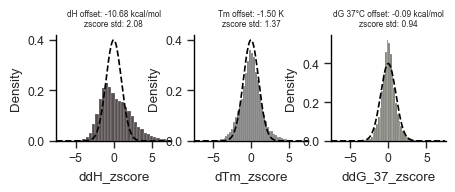

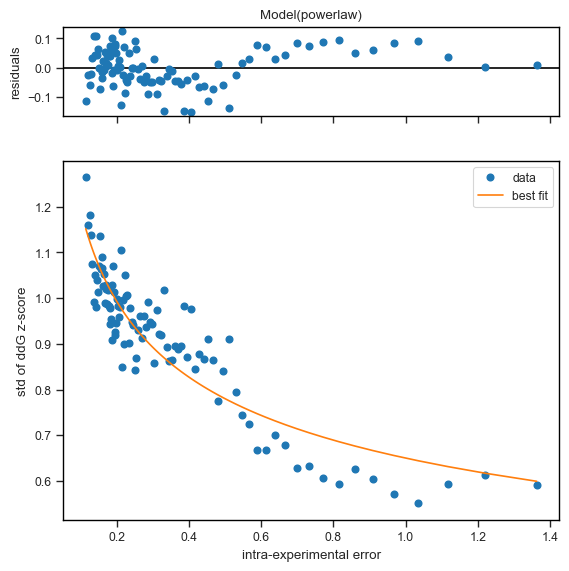

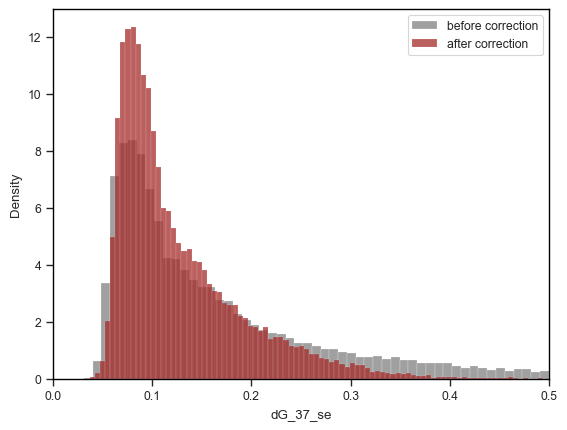

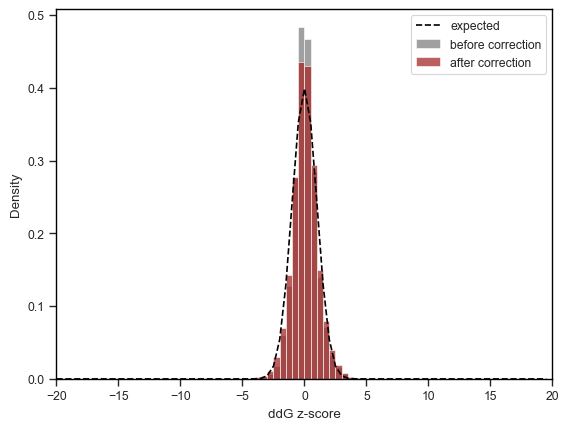

In [5]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')
arraydata = ArrayData(replicate_df=replicate_df.iloc[:3,:],
                      annotation_file=annotation_file,
                      learn_error_adjust_from=('r1', 'r2'))

arraydata.p_unfold.to_csv('./data/models/raw/arr_p_unfold_n=%d.csv'%len(arraydata.p_unfold))

## Basic preprocessing

### Adjust offset

In [6]:
arr = pd.read_csv('./data/models/raw/arr_v1_n=27732.csv', index_col=0)

(-4.0, 0.0)

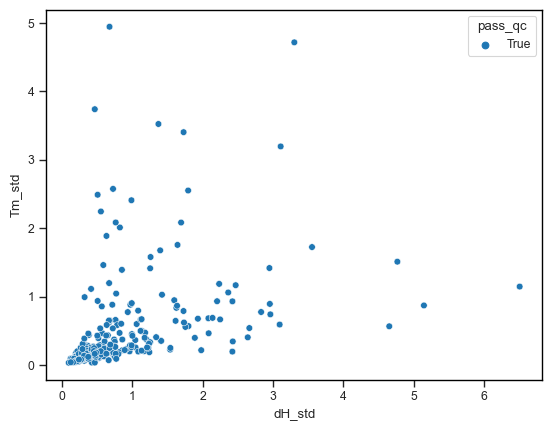

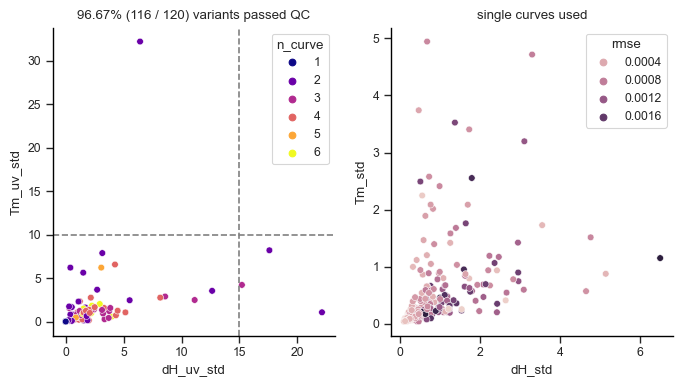

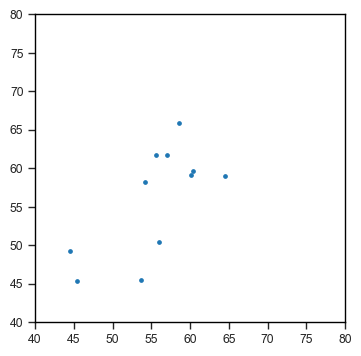

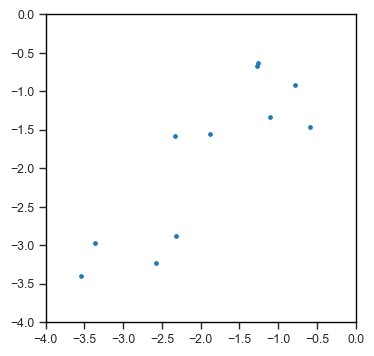

In [7]:
"""
Get the offset the violent way
"""
# copy pasted from command center for convenience
# only one peak found by AnalyzePeaks
hplc_clean_seqid = ["WC68_stem_3p", "WC68_stem_5p", "WC1025_split_5p", \
"WC1025_split_3p", "WC1375_stem_5p", "WC1375_stem_3p", "DMM004_5p", \
"DMM004_3p", "DMM005_5p", "DMM005_3p", "DMM006_5p", "DMM007_5p", \
"DMM007_3p", "BC0", "BC1", "BC6", "BC7", "BC8", "BC9", "BC10", \
"BC11", "MMCNNN2328", "MMCNNN2331", "MMCNNN2334", "MMCNNN2335", \
"MMCNNN2336", "MMCNNN2337", "MMTM1325", "MMTM176", "MMTM178", \
"MMTM179", "MMTM181", "MMTM185", "MMTM189", "MMTM1917", "MMTM29", \
"MMTM397", "MMTM509", "MMTM877", "DMM003_3p_rc", "DMM004_3p_rc", \
"DMM005_3p_rc", "DMM006_3p_rc", "DMM007_3p_rc", "TETNN1003", \
"TETNN999", "TETNN963", "TETNN979", "TETNNN1696", "TETNNN2082", \
"TETNNN1570", "HP002", "HP003", "HP004", "HP005", "HP007", "HP008", \
"HP010", "HP011", "HP012", "HP014", "HP015", "HP016", "HP017", \
"HP018", "HP019", "HP021", "HP022", "HP023", "HP024"]

sample_sheet_file = './data/uv_melt/ECLTables/ECLSampleSheet230502.csv'
datadir="./data/uv_melt/ECLExportAuto"
result_file='./data/uv_melt/uvmelt_230502_2.csv'
agg_result_file='./data/uv_melt/uvmelt_agg_230502.csv'

result_df = pd.read_csv(result_file, index_col=0)
result_agg_df = uv.agg_fit_result(uvmelt_result_file=result_file,
                               agg_result_file=agg_result_file,
                               single_curve_qc_criteria='rmse < 0.002 & dH_std < 10 & Tm_std < 5 & dH < 0 & dH > -100 & Tm > 0 & Tm < 120',
                               Tm_std_thresh=10, dH_std_thresh=15,
                               sample_sheet_file=sample_sheet_file, 
                               clean=True, only_use_cooling=True)

result_agg_df = result_agg_df[result_agg_df.SEQID.isin(hplc_clean_seqid)]

vf = result_agg_df.query('is_hairpin & Na_mM == 25').sort_values(by=['conc_uM', 'n_curve', 'curve_date']).drop_duplicates(keep='last').merge(arr, how='left', on='SEQID')

df_q = vf.dropna(subset=['Tm', 'dG_37'])#.query(plot_query)
df_q.dG_37_uv_std = 0

dTm = np.median(df_q.Tm_uv - df_q.Tm)
df_q['Tm_adj'] = df_q.Tm + dTm
df_q['dG_37_adj'] = util.get_dG(dH=df_q.dH, Tm=df_q.Tm_adj, celsius=37)

plt.figure(figsize=(4,4))
plt.plot(df_q.Tm_uv, df_q.Tm_adj, '.')
lim = [40,80]
plt.xlim(lim)
plt.ylim(lim)

plt.figure(figsize=(4,4))
plt.plot(df_q.dG_37_uv, df_q.dG_37_adj, '.')
lim = [-4,0]
plt.xlim(lim)
plt.ylim(lim)

In [8]:
def adjust_offset(dH, Tm, dTm):
    Tm_adj = Tm + dTm
    dG_37_adj = util.get_dG(dH=dH, Tm=Tm_adj, celsius=37)
    dS_adj = dH / (Tm_adj + 273.15)
    return dict(dH=dH, dS=dS_adj, Tm=Tm_adj, dG_37=dG_37_adj)

cols = ['dH_se', 'Tm_se', 'dG_37_se', 'dS_se', 'RefSeq', 'TargetStruct', 'Series']
arr_adj = pd.DataFrame(adjust_offset(arr.dH, arr.Tm, dTm))
arr_adj[cols] = arr[cols]

arr_adj.to_csv(os.path.join('./data/models/processed', 'arr_v1_adjusted_n=%d.csv' % arr_adj.shape[0]))

In [9]:
dTm

8.63686781734635

### Salt correct array data to fucking 1M Na+

`arr_adj` -> `arr_1M`

In [10]:
%%time
param_names = ['dH','dS','Tm', 'dG_37']
arr_1M = pd.DataFrame(index=arr_adj.index, columns=param_names)

for i, row in arr_adj.iterrows():
    param_name_dict = util.get_Na_adjusted_param(Na=1.0,dH=row.dH, Tm=row.Tm, seq=row.RefSeq)
    arr_1M.loc[i,:] = param_name_dict

arr_1M[cols] = arr[cols]

# remove dangles
# they should have been removed already but just in case
sd_mask = arr_1M.apply(lambda row: not row.name.startswith('SD'), axis=1)
arr_1M = arr_1M[sd_mask.values]

arr_1M.to_csv('./data/models/processed/arr_v1_1M_n=%d.csv'%arr_1M.shape[0])

CPU times: user 5.58 s, sys: 92.4 ms, total: 5.67 s
Wall time: 5.59 s


## Rude preprocessing

### Original to 1M Na+

`arr -> arr_1M`

In [3]:
arr = pd.read_csv('./data/models/raw/arr_v1_n=27732.csv', index_col=0)

In [4]:
%%time
param_names = ['dH','dS','Tm', 'dG_37']
arr_1M = pd.DataFrame(index=arr.index, columns=param_names)

for i, row in arr.iterrows():
    param_name_dict = util.get_Na_adjusted_param(Na=1.0,dH=row.dH, Tm=row.Tm, seq=row.RefSeq)
    arr_1M.loc[i,:] = param_name_dict

cols = ['dH_se', 'Tm_se', 'dG_37_se', 'dS_se', 'RefSeq', 'TargetStruct', 'Series']
arr_1M[cols] = arr[cols]

# remove dangles
# they should have been removed already but just in case
sd_mask = arr_1M.apply(lambda row: not row.name.startswith('SD'), axis=1)
arr_1M = arr_1M[sd_mask.values]

arr_1M.to_csv('./data/models/processed/arr_v2_1M_n=%d.csv'%arr_1M.shape[0])

CPU times: user 5.56 s, sys: 111 ms, total: 5.67 s
Wall time: 5.62 s


### Adjust offset w.r.t. NUPACK (maybe slightly circular)

`arr_1M -> arr_1M_adj`

Only use training data for adjustment.

In [5]:
arr_1M = pd.read_csv('./data/models/processed/arr_v2_1M_n=27732.csv', index_col=0)
data_split_dict = fileio.read_json('./data/models/raw/data_split.json')

In [6]:
arr_1M_train = arr_1M.loc[[x for x in arr_1M.index if x in data_split_dict['train_ind']]]

arr_1M_train = arr_1M_train.join(arr[['ConstructType', 'dG_37_NUPACK', 'Tm_NUPACK']])

<Axes: xlabel='ddG_37', ylabel='Density'>

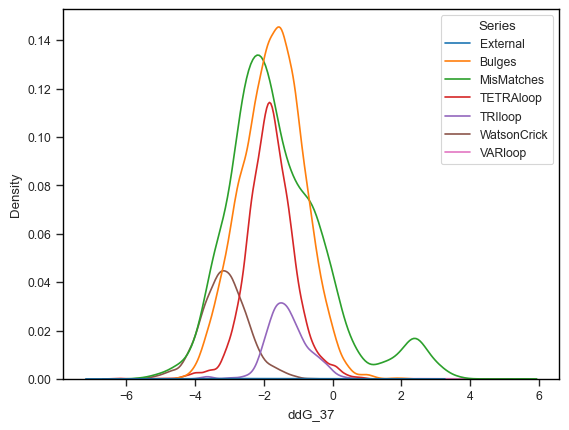

In [7]:
arr_1M_train['ddG_37'] = arr_1M_train.dG_37_NUPACK - arr_1M_train.dG_37
sns.kdeplot(data=arr_1M_train, x='ddG_37', hue='Series')

<Axes: xlabel='dTm', ylabel='Density'>

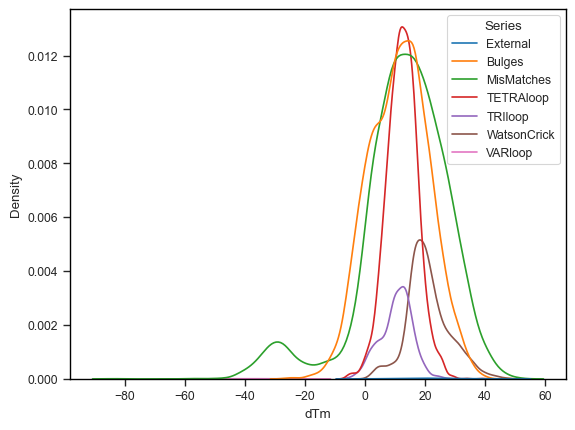

In [8]:
arr_1M_train['dTm'] = arr_1M_train.Tm_NUPACK - arr_1M_train.Tm
sns.kdeplot(data=arr_1M_train, x='dTm', hue='Series')

<Axes: xlabel='ddG_37', ylabel='Density'>

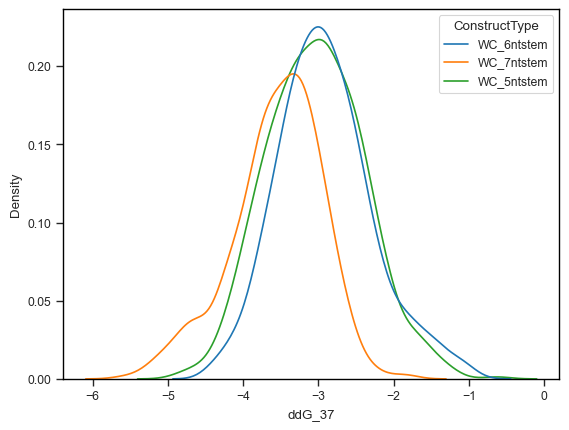

In [72]:
sns.kdeplot(data=arr_1M_train.query('Series == "WatsonCrick"'), x='ddG_37', hue='ConstructType')

In [9]:
dTm_by_series = arr_1M_train.groupby(['Series', 'ConstructType'])['dTm'].apply(np.median).fillna(value=0)
dTm_by_series

Series       ConstructType     
Bulges       NNN_3primebulge       10.005800
             NNN_5prime_bulge      12.001761
             NN_3primebulge        22.749282
             NN_5primebulge        22.232615
External     BaeControls           21.004319
             WBcontrols             0.000000
MisMatches   3mer                  11.632876
             AC_mismatch_varpos    26.370518
             Centered              17.094109
             GT_mismatch_varpos     6.527488
TETRAloop    NN                    16.740007
             NNN                   11.764665
TRIloop      NN                    15.684302
             NNN                   10.201633
VARloop      VARloop              -35.681387
WatsonCrick  WC_5ntstem            26.259081
             WC_6ntstem            19.175658
             WC_7ntstem            17.734244
Name: dTm, dtype: float64

In [10]:
arr_1M_train['Tm_adj'] = arr_1M_train.apply(lambda row: row.Tm + dTm_by_series[row['Series']][row['ConstructType']], axis=1)

In [13]:
arr_1M_train[['Tm', 'Tm_adj']]

,Tm,Tm_adj
SEQID,,
BC1,54.750994,75.755314
BC10,29.959820,50.964139
BC15,41.645712,62.650032
BC16,35.963347,56.967667
BC17,33.353738,54.358057
...,...,...
varloop257581,65.502814,29.821427
varloop257601,49.375317,13.693931
varloop257621,44.087860,8.406473


In [11]:
def recalculate(dH, Tm_adj):
    dG_37_adj = util.get_dG(dH=dH, Tm=Tm_adj, celsius=37)
    dS_adj = dH / (Tm_adj + 273.15)
    return dict(dH=dH, dS=dS_adj, Tm=Tm_adj, dG_37=dG_37_adj)

cols = ['dH_se', 'Tm_se', 'dG_37_se', 'dS_se', 'RefSeq', 'TargetStruct', 'Series']
arr_adj = pd.DataFrame(recalculate(arr_1M_train.dH, arr_1M_train.Tm_adj))
arr_adj[cols] = arr[cols]

arr_adj.to_csv(os.path.join('./data/models/processed', 'arr_v2_adjusted_n=%d.csv' % arr_adj.shape[0]))

## Update data split

Remove the variants measured by UV melting from the training set.

In [4]:
agg_result_file='./data/uv_melt/uvmelt_agg_230502.csv'
uv_df = pd.read_csv(agg_result_file, index_col=1)
arr_1M = pd.read_csv('./data/models/processed/arr_v1_1M_n=27732.csv', index_col=0)
arr_p_unfold = pd.read_csv('./data/models/raw/arr_p_unfold_n=30924.csv', index_col=0)


In [12]:
from sklearn.model_selection import train_test_split

ind2split = list(set(arr_1M.index) - set(uv_df.index))
series2split = arr_1M.loc[ind2split, 'Series']

train_val_ind, test_ind = train_test_split(ind2split, test_size=.05,
                                       random_state=42, stratify=series2split)
train_ind, val_ind = train_test_split(arr_1M.loc[train_val_ind,:].index, test_size=.05,
                                      random_state=43, stratify=arr_1M.loc[train_val_ind,:].Series)
test_ind += list(set(uv_df.index) & set(arr_1M.index))
n_train, n_val, n_test = len(train_ind), len(val_ind), len(test_ind)
print('train','val ','test')
print(n_train, n_val, n_test)

split_dict = dict(train_ind=train_ind.tolist(),
                  val_ind=val_ind.tolist(),
                  test_ind=test_ind)
with open('./data/models/raw/data_split.json', 'w') as fh:
    json.dump(split_dict, fh, indent=4)

additional_ind = list(set(arr_p_unfold.index) - set(arr_1M.index))

additional_train_val_ind, additional_test_ind = train_test_split(additional_ind, test_size=.1,
                                       random_state=44)
additional_train_ind, additional_val_ind = train_test_split(arr_p_unfold.loc[additional_train_val_ind,:].index.tolist(), test_size=.1,
                                      random_state=45)

split_dict['train_ind'] += additional_train_ind
split_dict['val_ind'] += additional_val_ind
split_dict['test_ind'] += additional_test_ind

fileio.write_json(split_dict, './data/models/raw/data_split_p_unfold.json')

train val  test
24971 1315 1446


## Other data prep

In [13]:
sl_mm = pd.read_csv('./data/literature/SantaLucia_single_mismatch.csv', index_col=0)
sl_mm['isWC'] = sl_mm.dG_37.apply(lambda x: x == 'WC')
sl_wc = pd.read_csv('./data/literature/SantaLucia_full.tsv', sep='\t', index_col=0)

def add_wc(row):
    if row.dG_37 == 'WC':
        return float(sl_wc.loc[row.name, 'dG_37'])
    else:
        return float(row.dG_37)
    
sl_mm['dG_37'] = sl_mm.apply(add_wc, axis=1)
sl_mm.to_csv('./data/literature/SantaLucia_mm_wc.csv')

In [39]:
"""
Oliveira data split (OV)
"""
center_df = fileio.read_Oliveira_df('./data/literature/Oliveira_2020_mismatches.csv')

val_ind, test_ind = train_test_split(center_df.index, test_size=.5,
                                       random_state=42)

n_val, n_test = len(val_ind), len(test_ind)
print('val ','test')
print(n_val, n_test)

split_dict = dict(val_ind=val_ind.tolist(),
                  test_ind=test_ind.tolist())

with open('./data/models/raw/data_split_Oliveira.json', 'w') as fh:
    json.dump(split_dict, fh, indent=4)

val  test
1387 1388


In [40]:
center_df

,a,b,center,RefSeq,TargetStruct,Tm
SEQID,,,,,,
OV0,CGACGTGCGCGATGTGCTG,CAGCACATCGCGCACGTCG,GCG/CGC,"[CGACGTGCGCGATGTGCTG, CAGCACATCGCGCACGTCG]",(((((((((((((((((((+))))))))))))))))))),69.3
OV1,CGACGTGCGCCATGTGCTG,CAGCACATGGCGCACGTCG,GCC/CGG,"[CGACGTGCGCCATGTGCTG, CAGCACATGGCGCACGTCG]",(((((((((((((((((((+))))))))))))))))))),68.7
OV2,CGACGTGCGGGATGTGCTG,CAGCACATCCCGCACGTCG,GGG/CCC,"[CGACGTGCGGGATGTGCTG, CAGCACATCCCGCACGTCG]",(((((((((((((((((((+))))))))))))))))))),67.7
OV3,CGACGTGCGACATGTGCTG,CAGCACATGTCGCACGTCG,GAC/CTG,"[CGACGTGCGACATGTGCTG, CAGCACATGTCGCACGTCG]",(((((((((((((((((((+))))))))))))))))))),67.2
OV4,CGACGTGCGGAATGTGCTG,CAGCACATTCCGCACGTCG,GGA/CCT,"[CGACGTGCGGAATGTGCTG, CAGCACATTCCGCACGTCG]",(((((((((((((((((((+))))))))))))))))))),66.6
...,...,...,...,...,...,...
OV2770,CGACGTGCACCATGTGCTG,CAGCACATTCGGCACGTCG,ACC/GCT,"[CGACGTGCACCATGTGCTG, CAGCACATTCGGCACGTCG]",((((((((...((((((((+))))))))...)))))))),42.6
OV2771,CGACGTGCACCATGTGCTG,CAGCACATTACGCACGTCG,ACC/CAT,"[CGACGTGCACCATGTGCTG, CAGCACATTACGCACGTCG]",((((((((...((((((((+))))))))...)))))))),42.4
OV2772,CGACGTGCACCATGTGCTG,CAGCACATCCAGCACGTCG,ACC/ACC,"[CGACGTGCACCATGTGCTG, CAGCACATCCAGCACGTCG]",((((((((...((((((((+))))))))...)))))))),42.2


In [34]:
"""
348oligos data split (DP)
"""
uv_df = pd.read_csv('./data/literature/compiled_DNA_Tm_348oligos.csv', index_col=0)

val_ind, test_ind = train_test_split(uv_df.index, test_size=.5,
                                       random_state=42)

n_val, n_test = len(val_ind), len(test_ind)
print('val ','test')
print(n_val, n_test)

split_dict = dict(val_ind=val_ind.tolist(),
                  test_ind=test_ind.tolist())

with open('./data/models/raw/data_split_348oligos.json', 'w') as fh:
    json.dump(split_dict, fh, indent=4)

val  test
174 174
